In [30]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
from google.colab import drive
from skimage import color
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from google.colab.patches import cv2_imshow

print("All set to go")

All set to go


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['bird.jpg', 'butterfly.jpg', 'flower.jpg', 'lalitha-mahal.jpg', 'old-house.jpg', 'ruins.jpg']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if sys.path[0] == '':


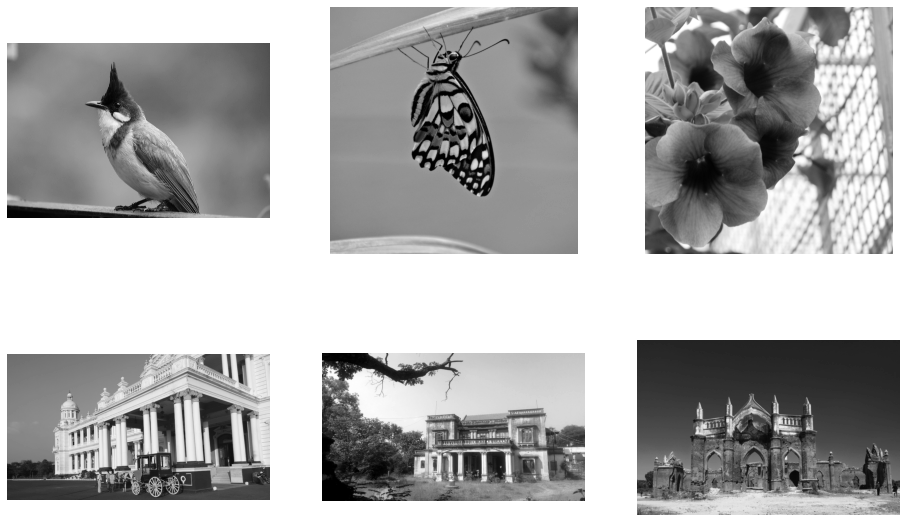

In [31]:
drive.mount('/content/gdrive')
img_dir = "./gdrive/My Drive/Colab-images/edgedetection"
flist = sorted([f for f in listdir(img_dir) if isfile(join(img_dir, f))])
print(flist)

fig = plt.figure(figsize=(16,10)) # Using a large canvas to depict the images clearly
n = len(flist)
images_gray=[]
for i in range(n):
  fig.add_subplot(2,n//2,i+1)
  img_bgr = cv2.imread(join(img_dir,flist[i]),0)
  img_gray = color.rgb2gray(img_bgr) # Covert image to grayscale 
  images_gray.append(img_gray[:,:]) 
  plt.imshow(img_gray,cmap='gray')
  plt.axis('off')


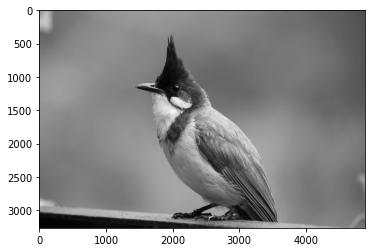

In [32]:
img_idx = 0  # use some index to choose your image
my_image = images_gray[img_idx]
plt.imshow(my_image, cmap="gray")

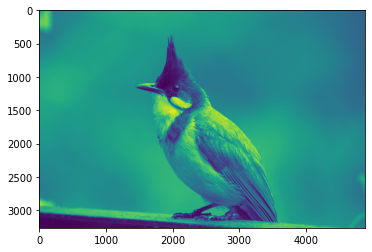

In [33]:
Gaussian_blur= cv2.GaussianBlur(my_image,(3,3),cv2.BORDER_DEFAULT)
plt.imshow(Gaussian_blur)

(3267, 4897)


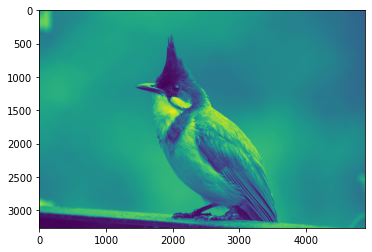

In [34]:
#Using Guassain filter for noise reduction or blurring(skimage) at sigma value=1
from skimage.filters import gaussian
skimage_blur=skimage.filters.gaussian(my_image,sigma=1,mode='constant',cval=0.0)
plt.imshow(skimage_blur)
print(skimage_blur.shape)


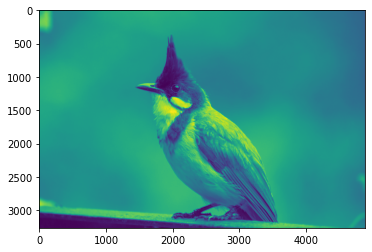

In [35]:
#Using Guassain filter for noise reduction or blurring(skimage) at sigma value=3
import skimage
skimage_blur3=skimage.filters.gaussian(my_image,sigma=3,mode='constant',cval=0.0)
plt.imshow(skimage_blur3)

(-0.5, 4896.5, 3266.5, -0.5)

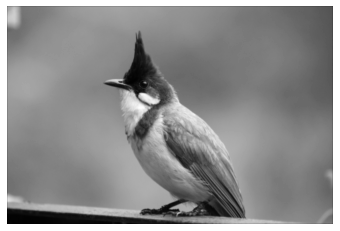

In [36]:
from skimage.filters import gaussian
skimage_blur5=gaussian(my_image,sigma=5,mode='constant',cval=0.0)
plt.imshow(skimage_blur5,cmap='gray')
#plt.imshow(skimage_blur5,cmap='gray')

plt.axis('off')

In [37]:
filter0=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])#horizontal direction
filter45=np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
  
filter90=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])#vertical direction
filter135=np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
#plt.imshow(filter_v ,cmap="gray")

In [38]:
#k=1
#height=1067
#width=1600
#img=Padarray(skimage_blur,[k,k],'replicate')
#for i in range(2,height):
  
    #for j in range(2,width):
    
        #v= double((img(i-1:i+1,j-1:j+1)*filter0))
        #v=(sum(v(:)))
        #c(i-1,j-1)=uint8(ceil(v))
    
        #plt.imshow(c, cmap="gray")

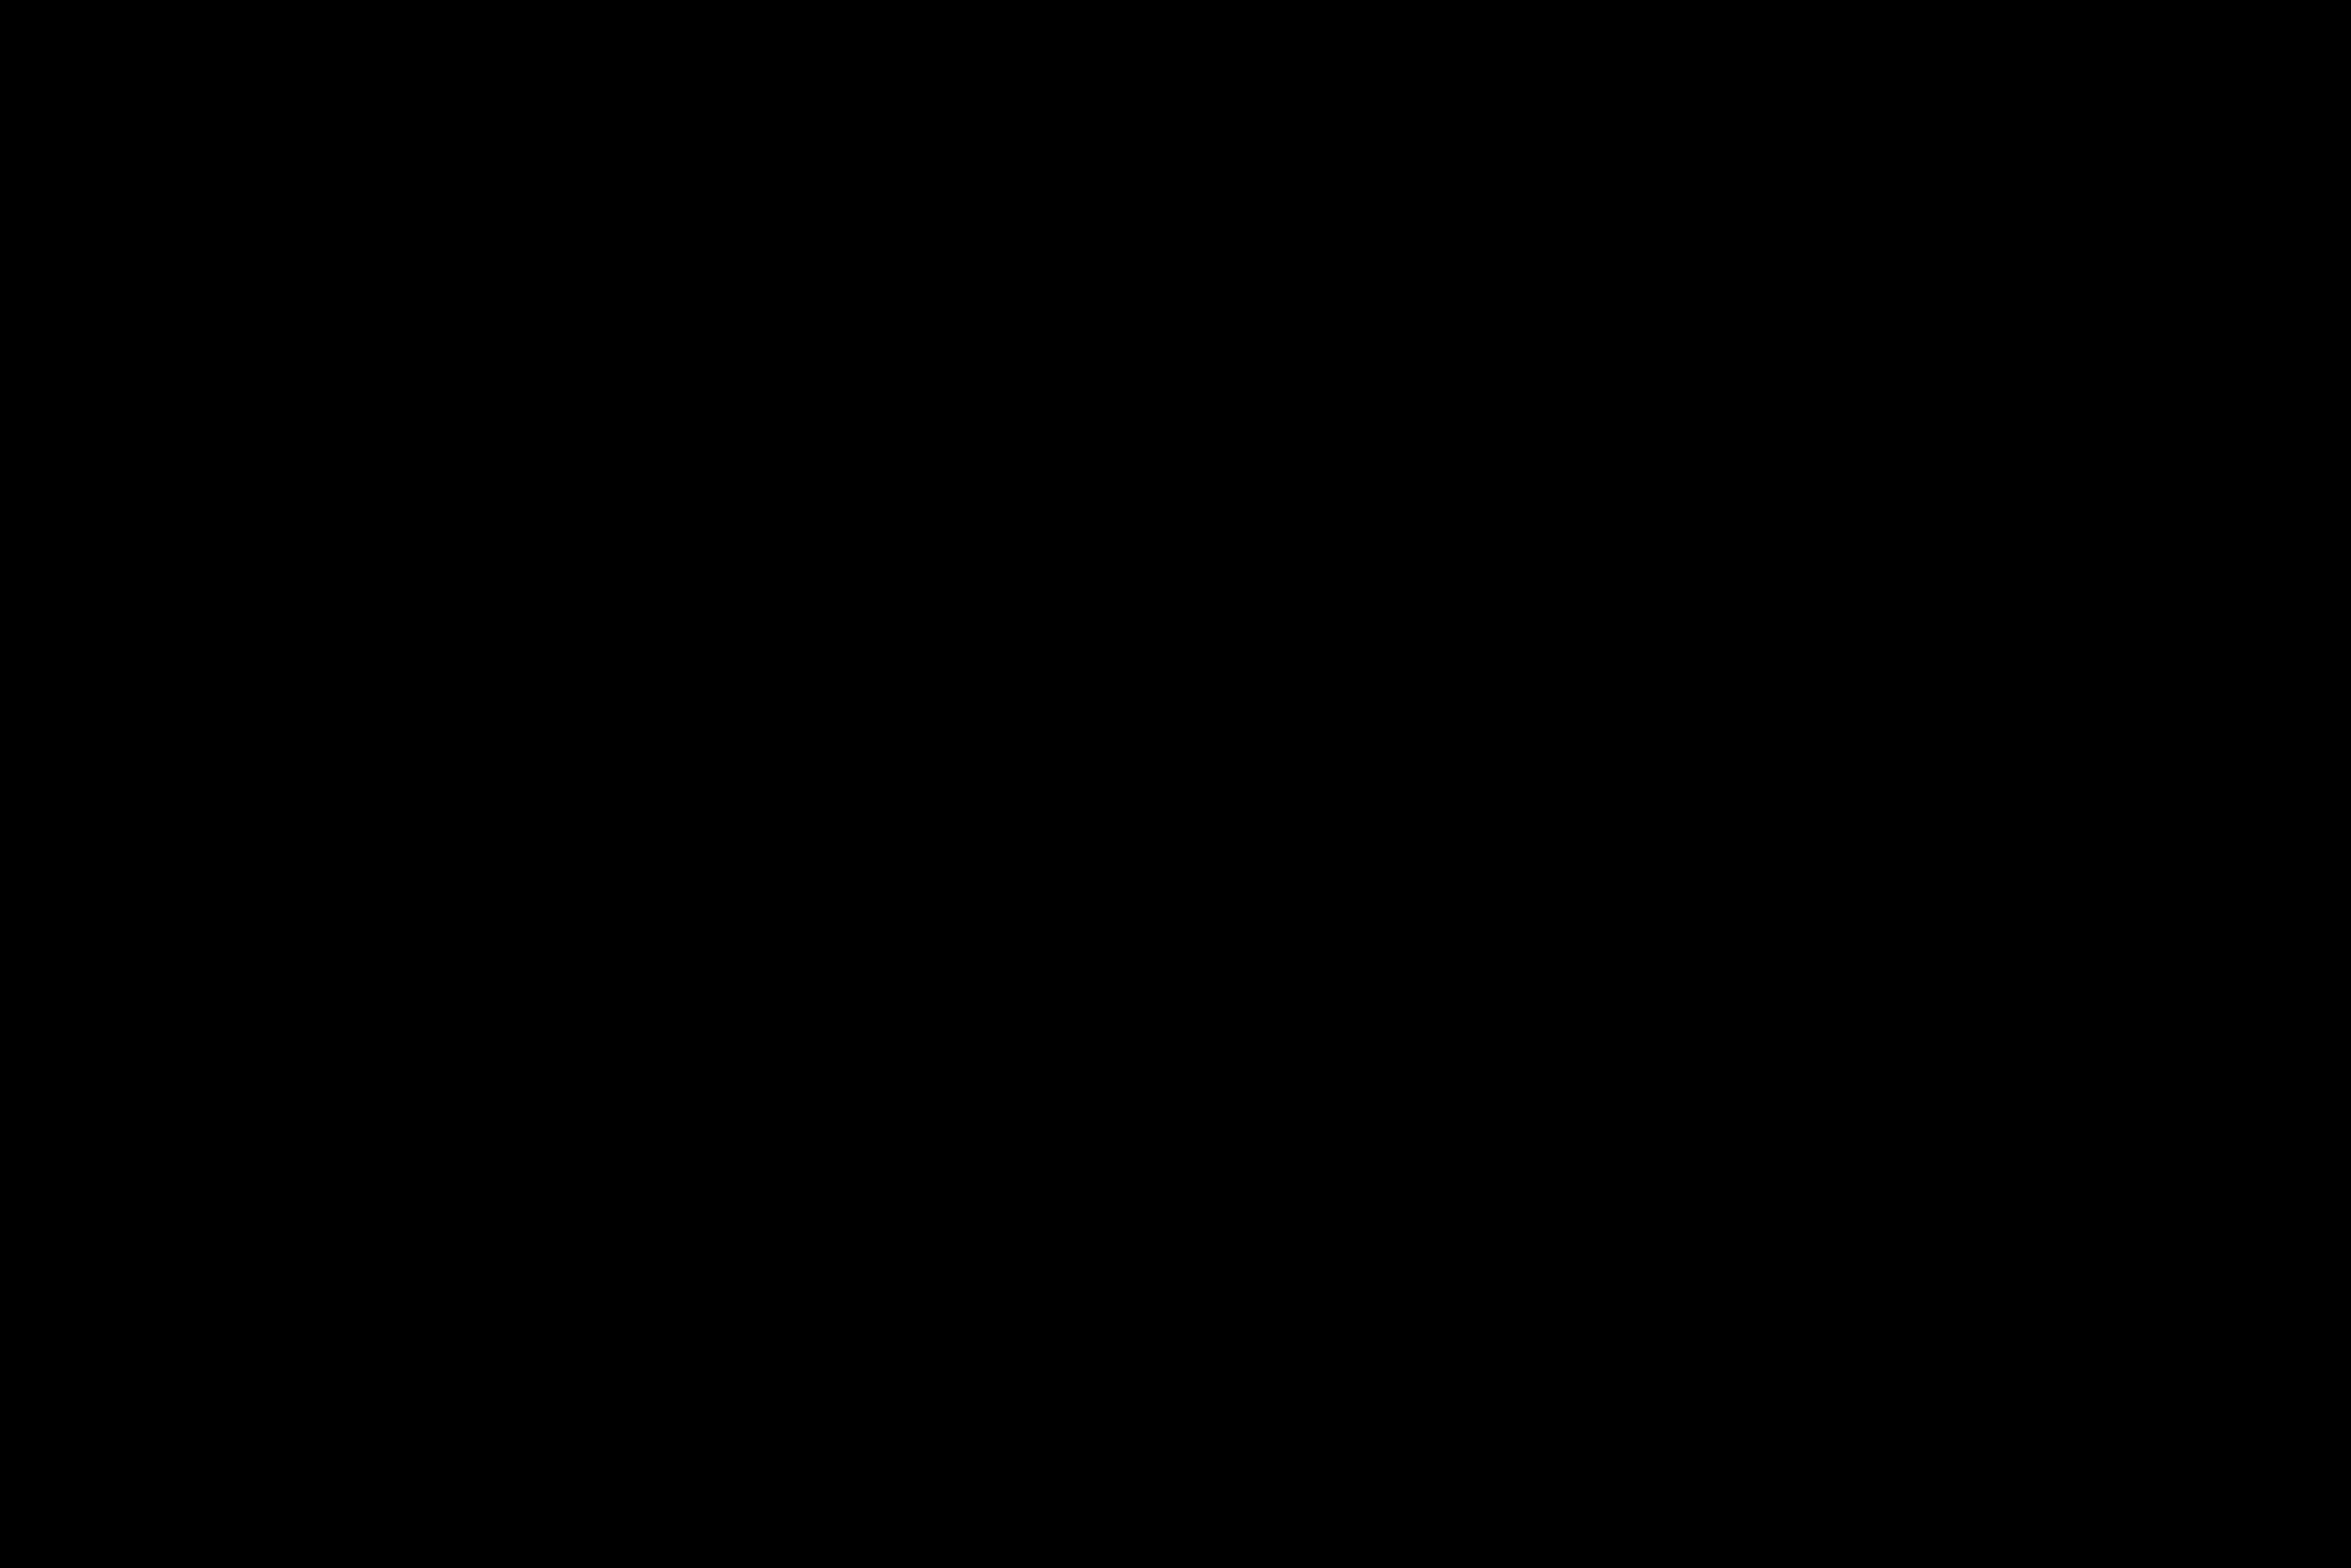

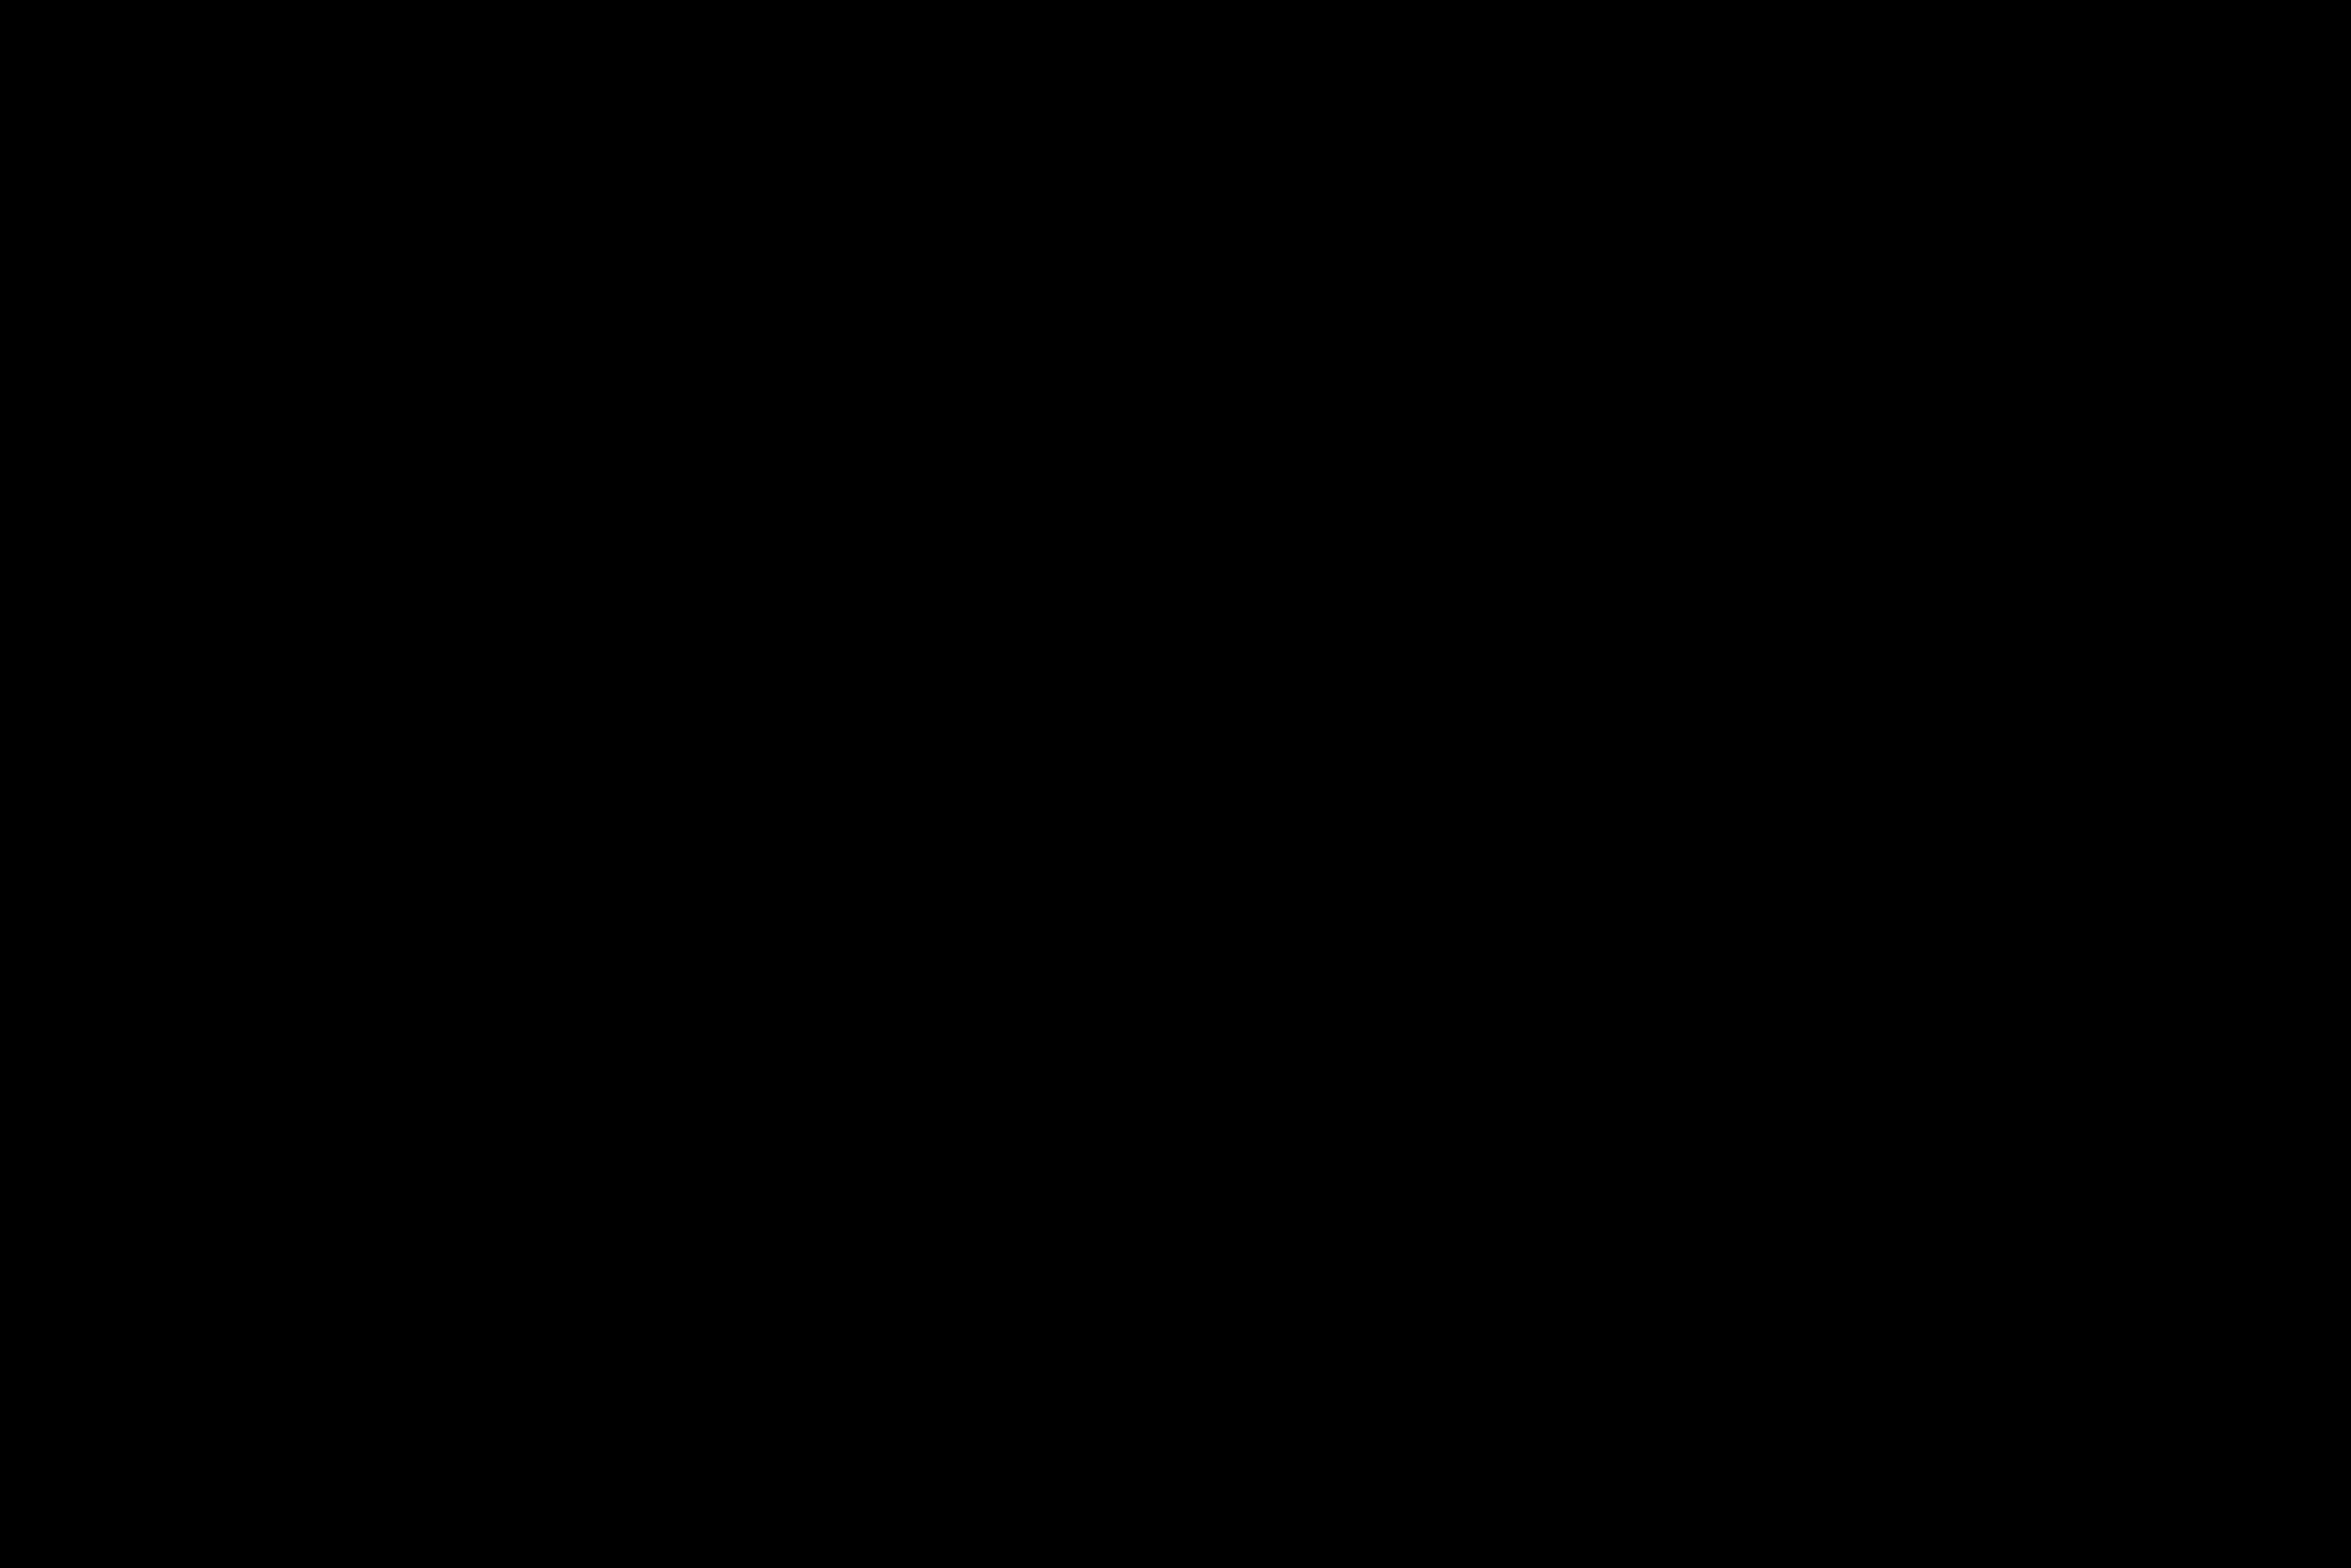

In [41]:
# Applying the filter2D() function
edges0 = cv2.filter2D(src=skimage_blur, ddepth=-1, kernel=filter0)

# Shoeing the original and output image
cv2_imshow(skimage_blur)
cv2_imshow(edges0)

cv2.waitKey()
cv2.destroyAllWindows()


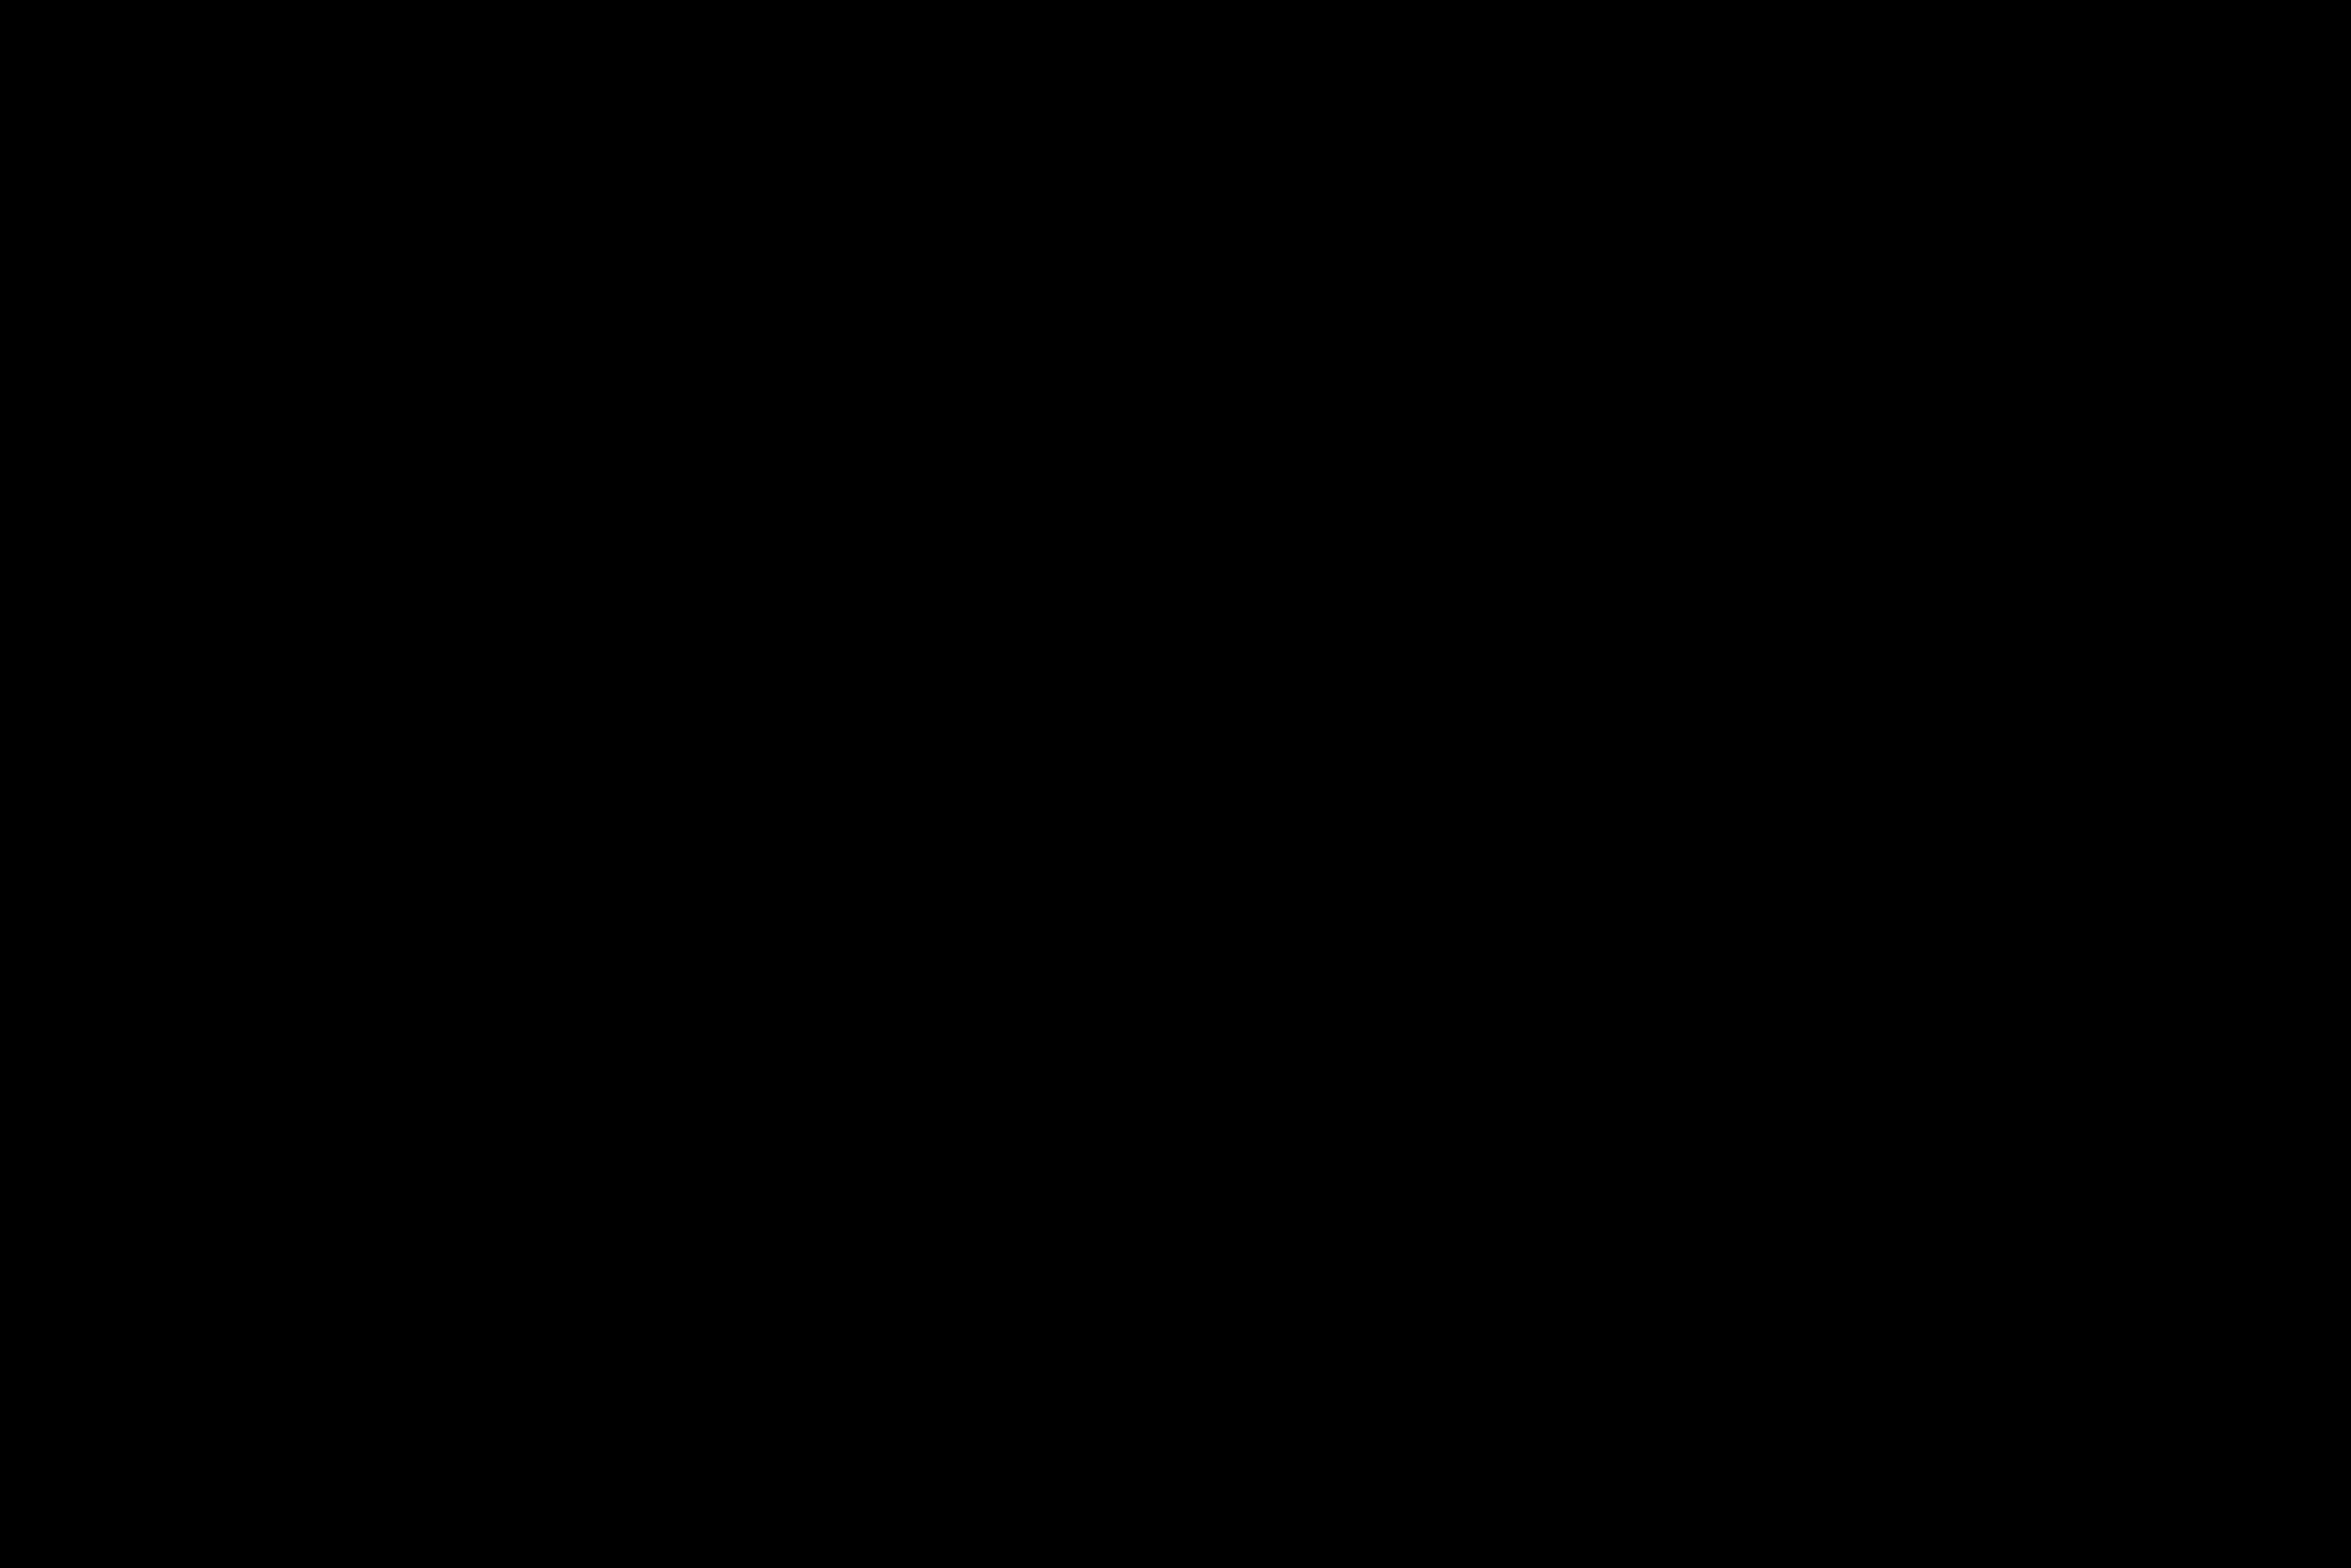

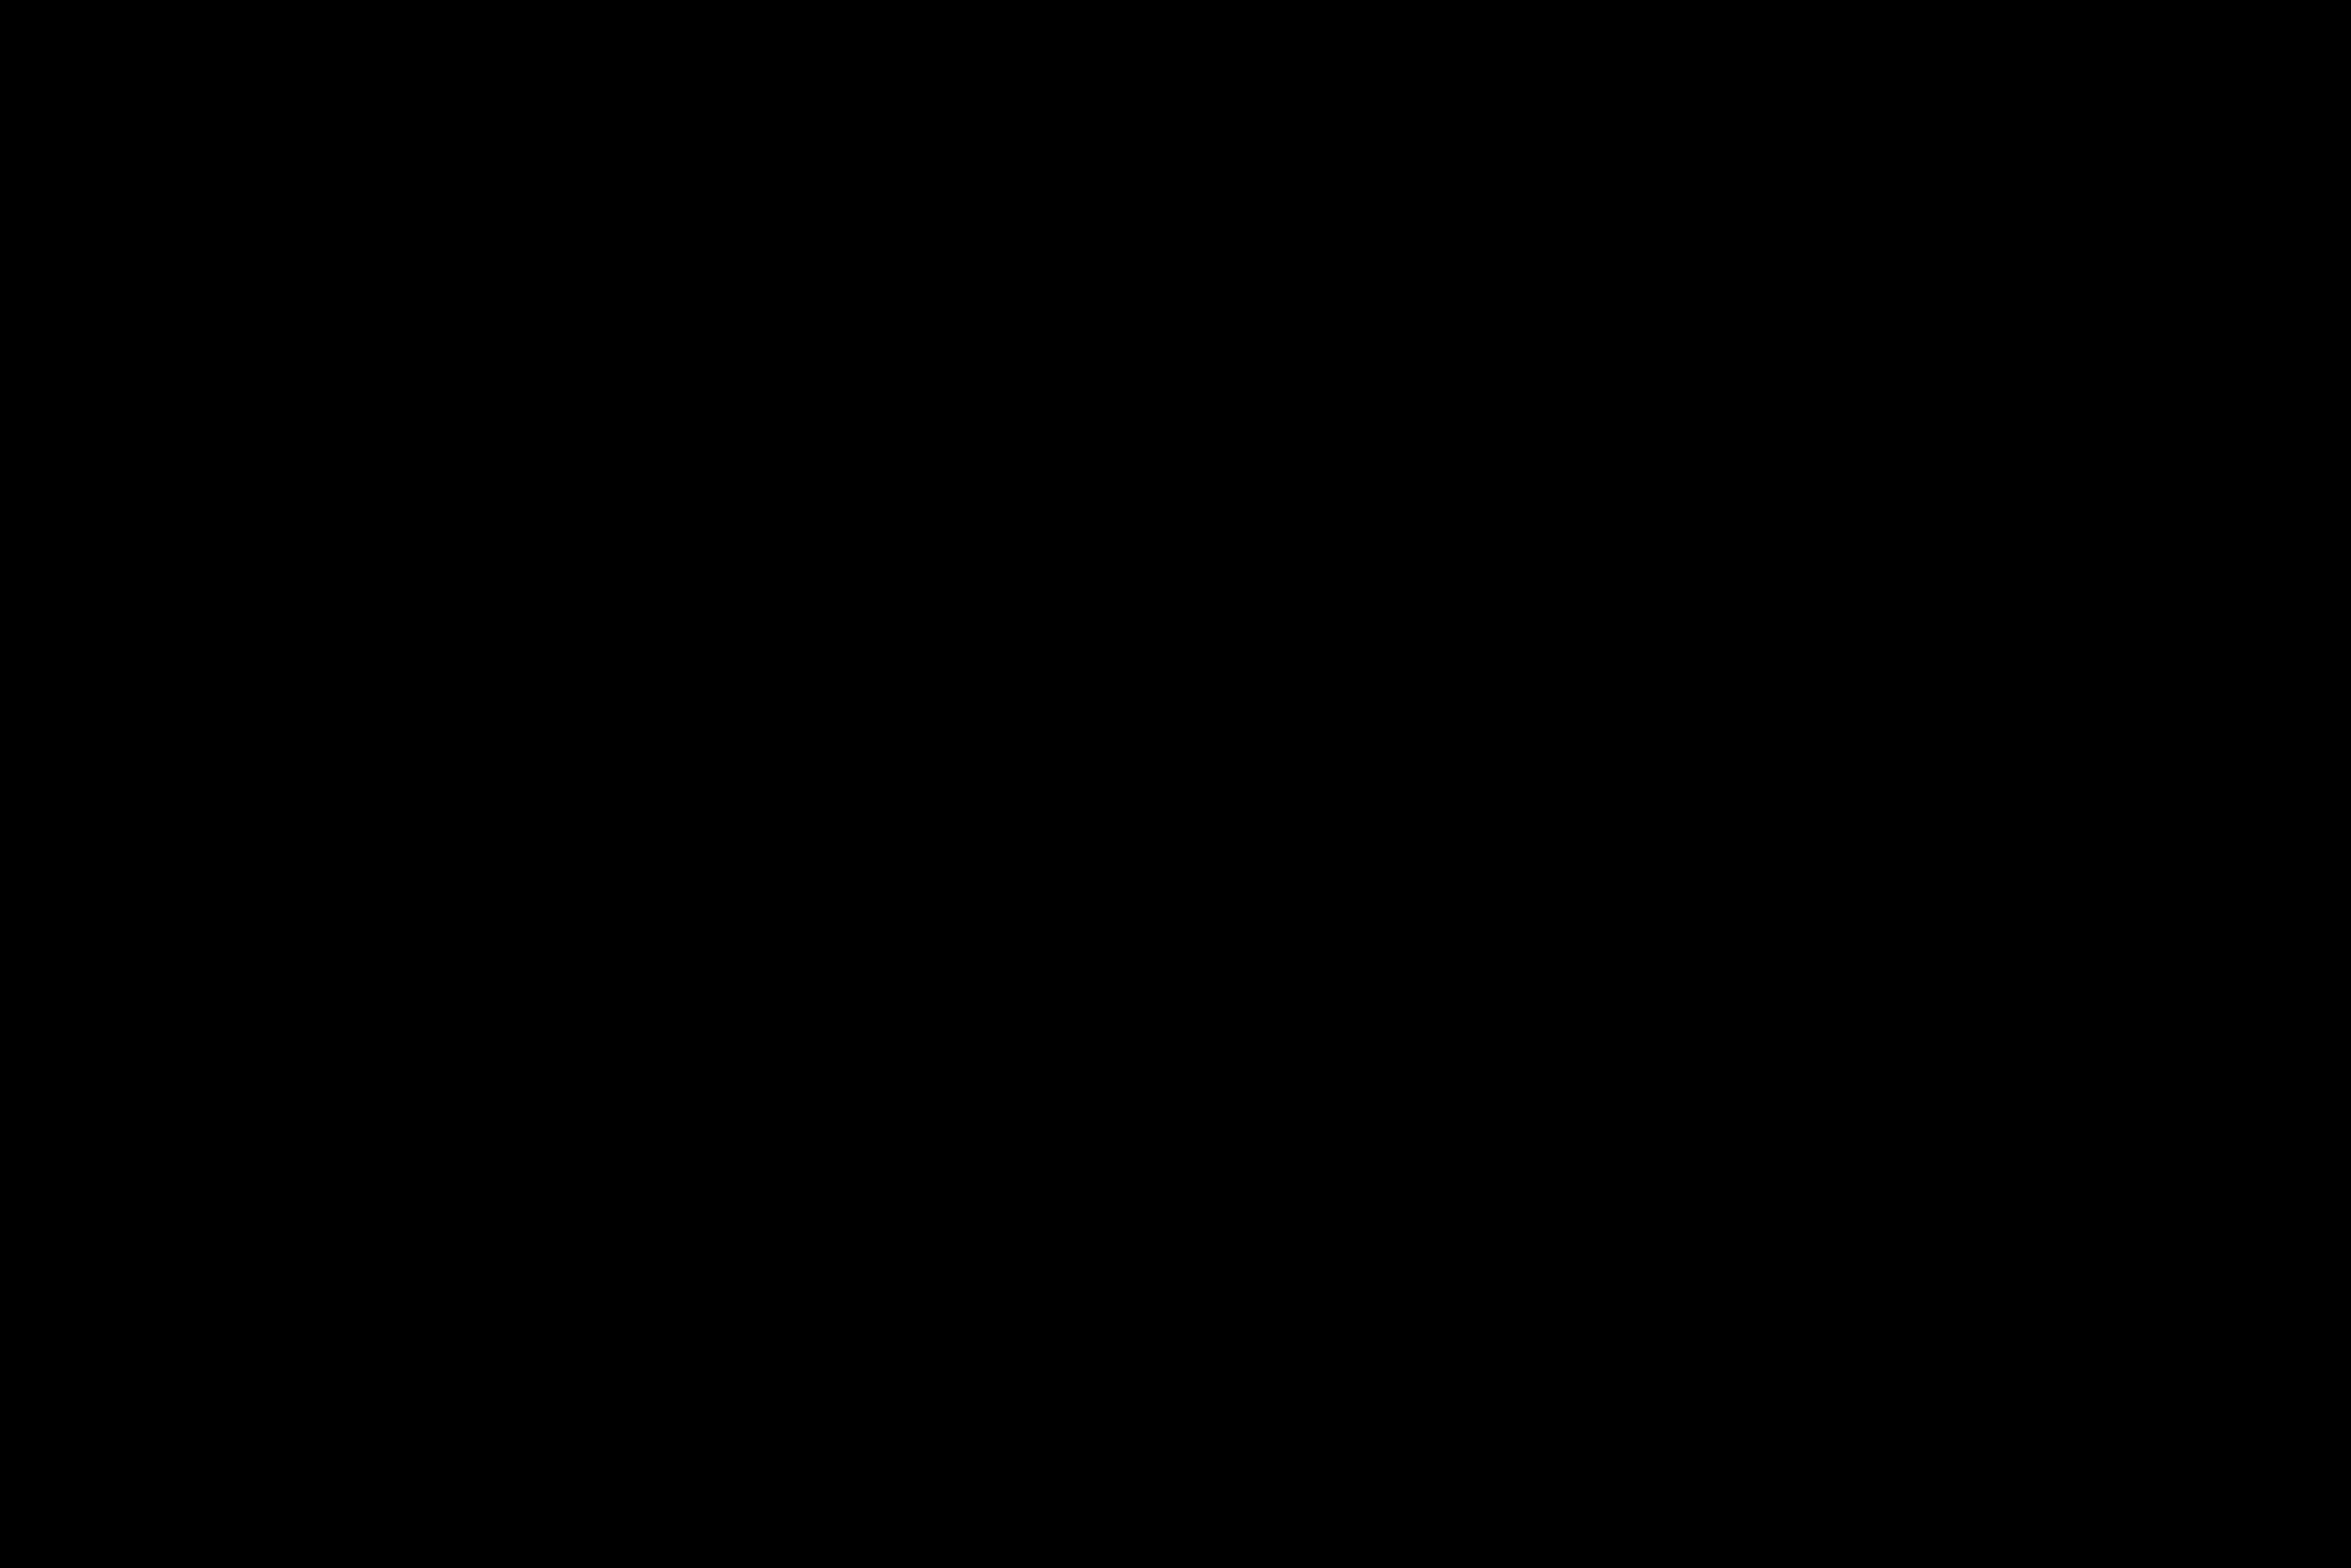

In [44]:
# Applying the filter2D() function
edges45 = cv2.filter2D(src=skimage_blur, ddepth=-1, kernel=filter45)

# Shoeing the original and output image
cv2_imshow(skimage_blur)
cv2_imshow(edges45)

cv2.waitKey()
cv2.destroyAllWindows()

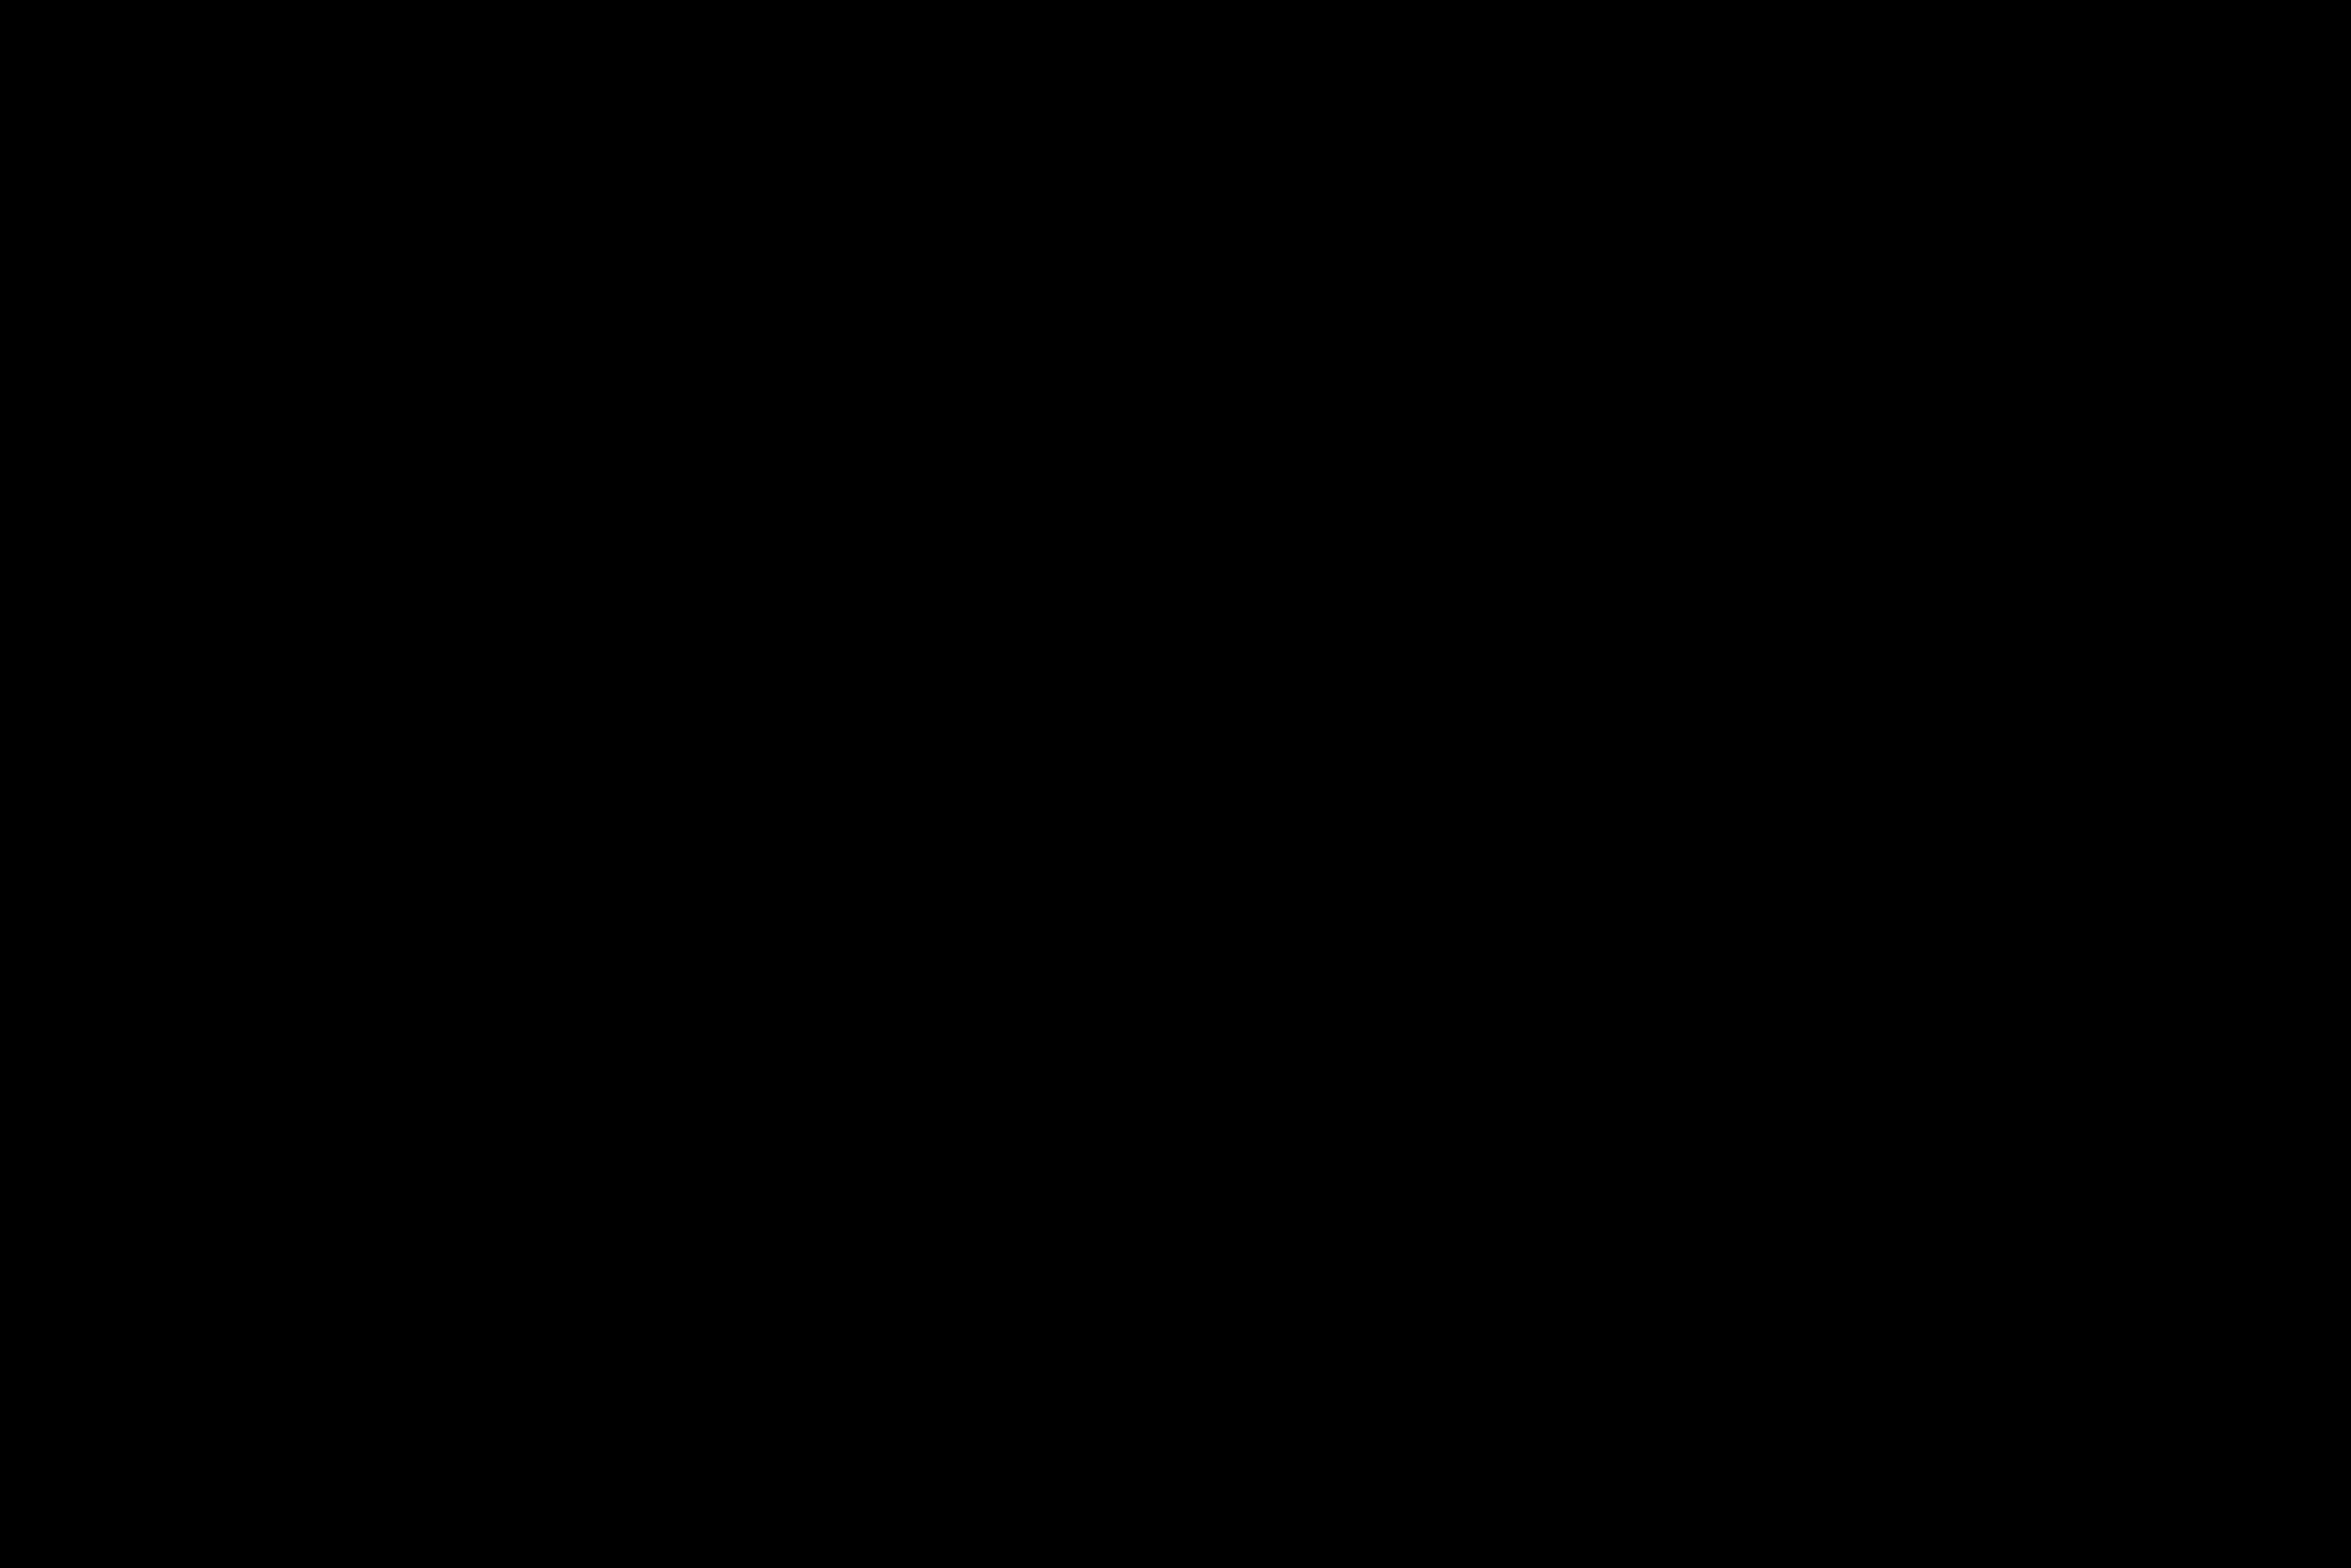

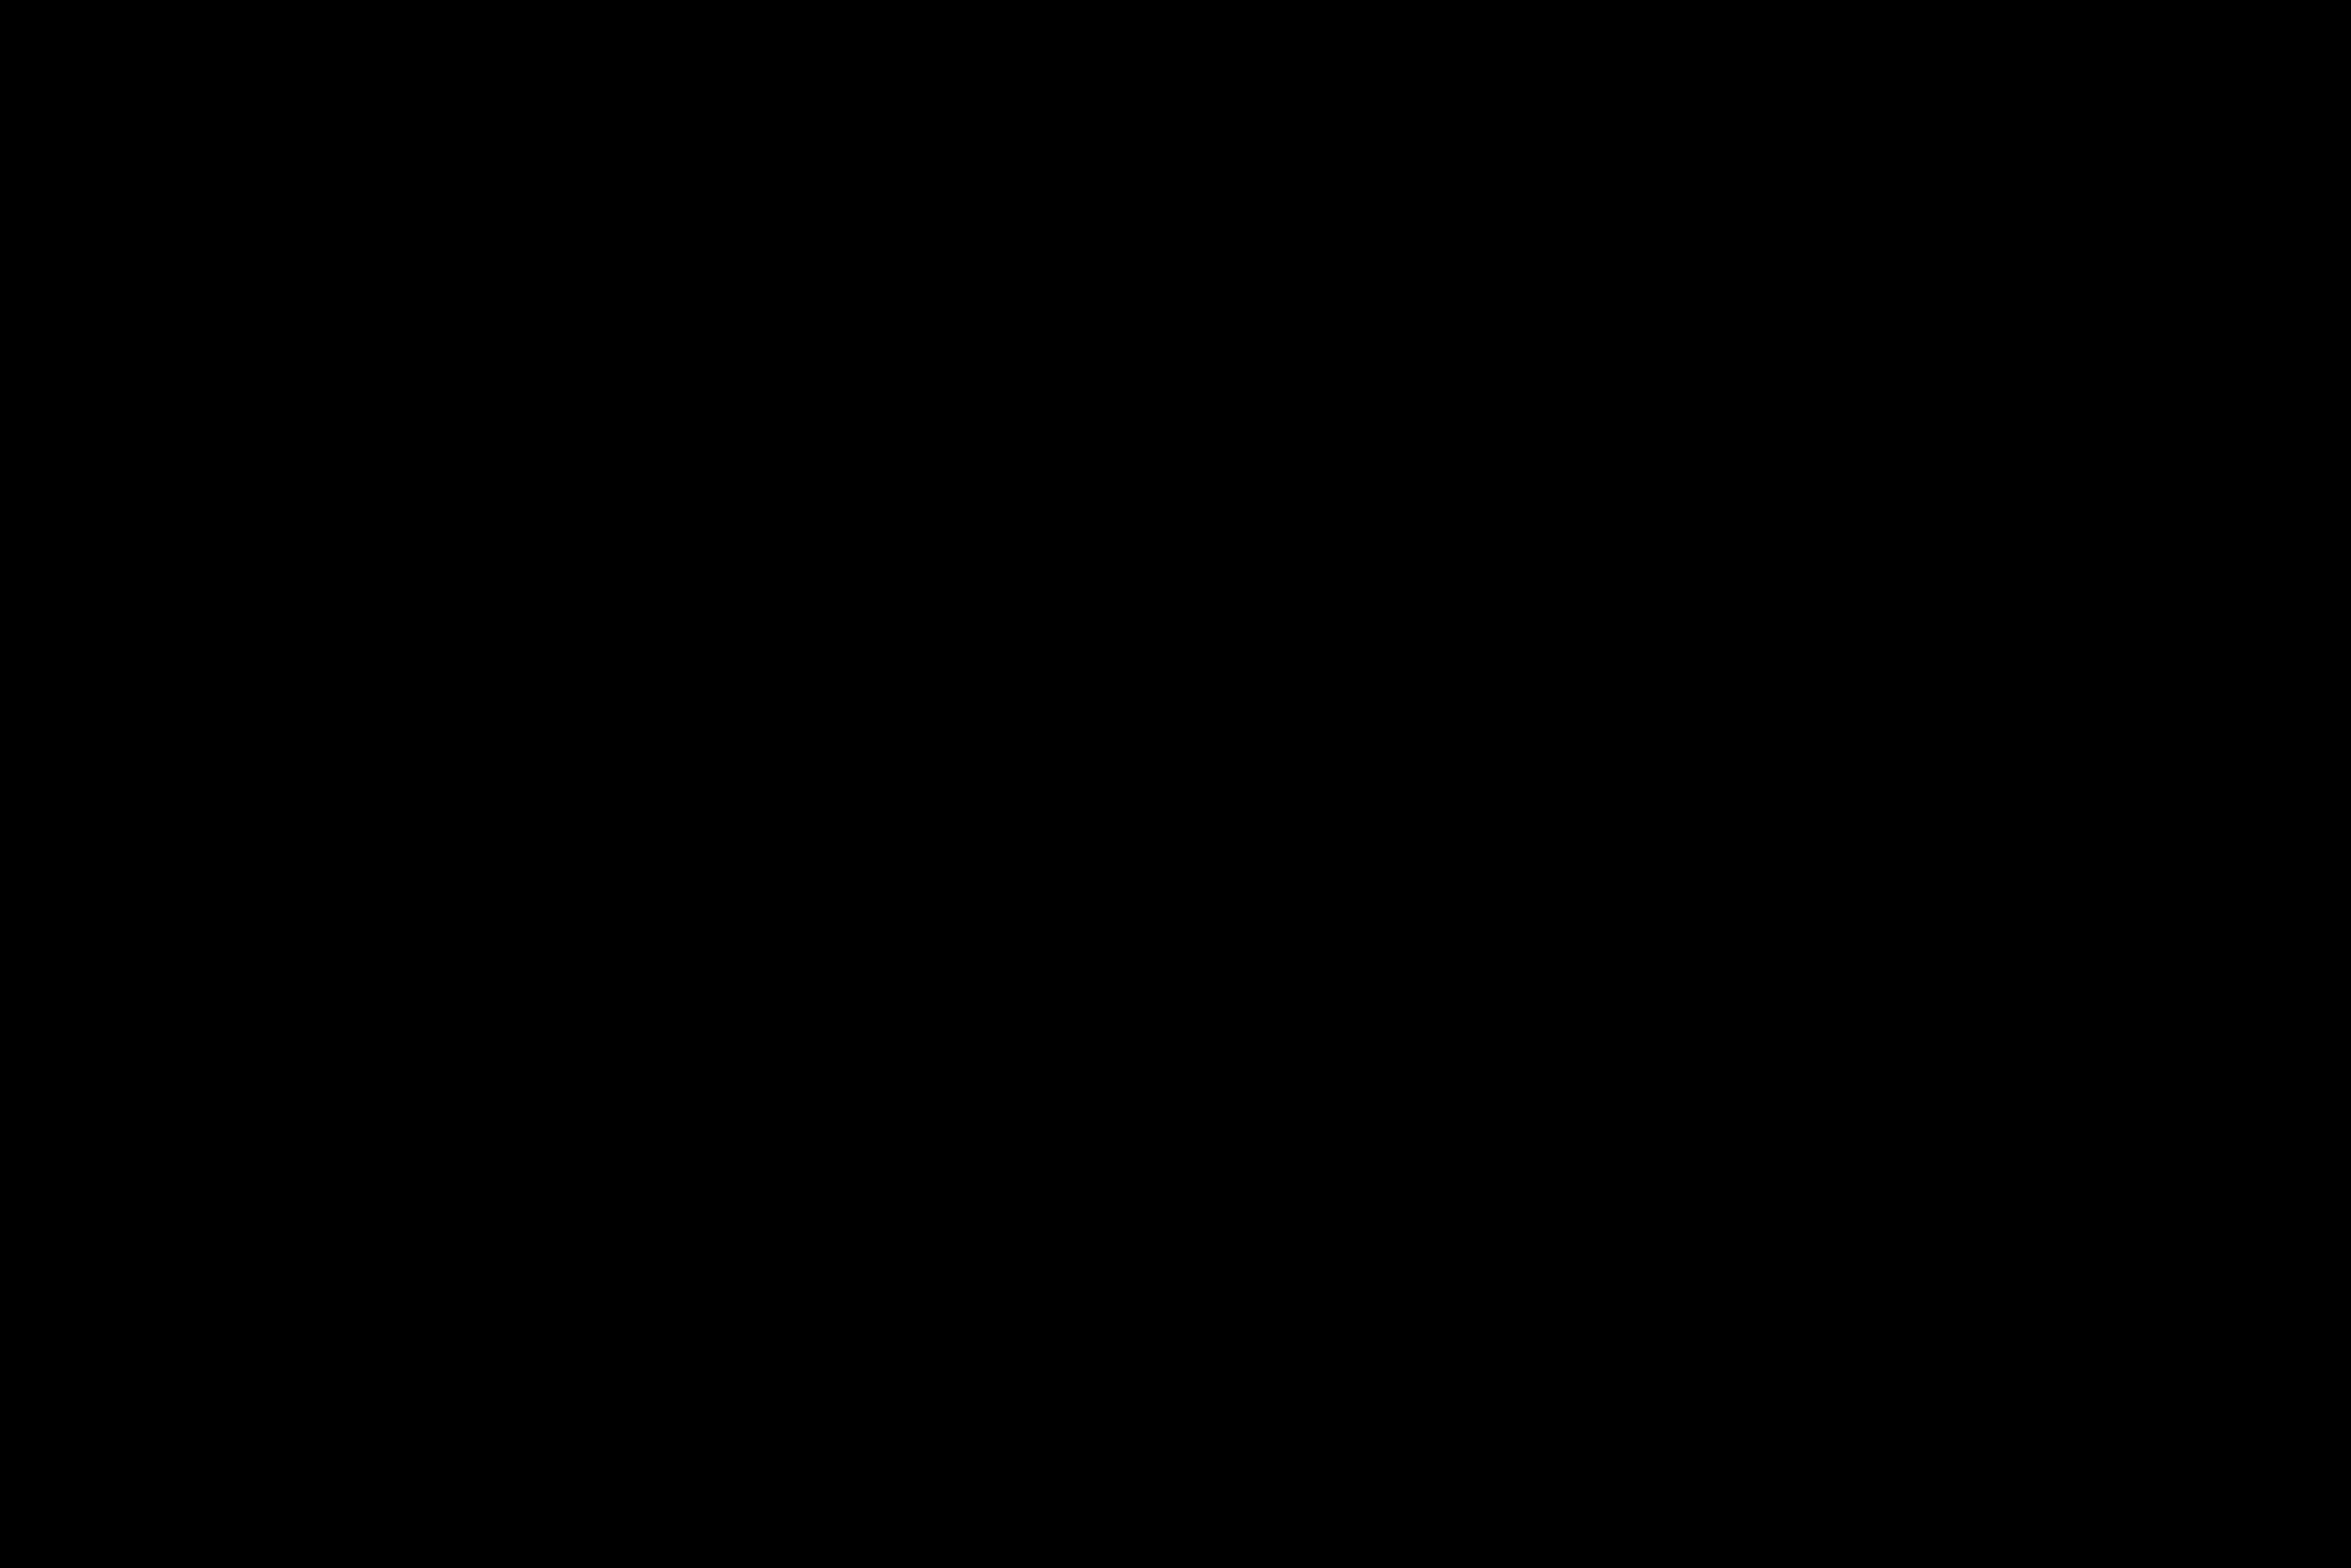

In [45]:
# Applying the filter2D() function
edges90 = cv2.filter2D(src=skimage_blur, ddepth=-1, kernel=filter90)

# Shoeing the original and output image
cv2_imshow(skimage_blur)
cv2_imshow(edges90)

cv2.waitKey()
cv2.destroyAllWindows()

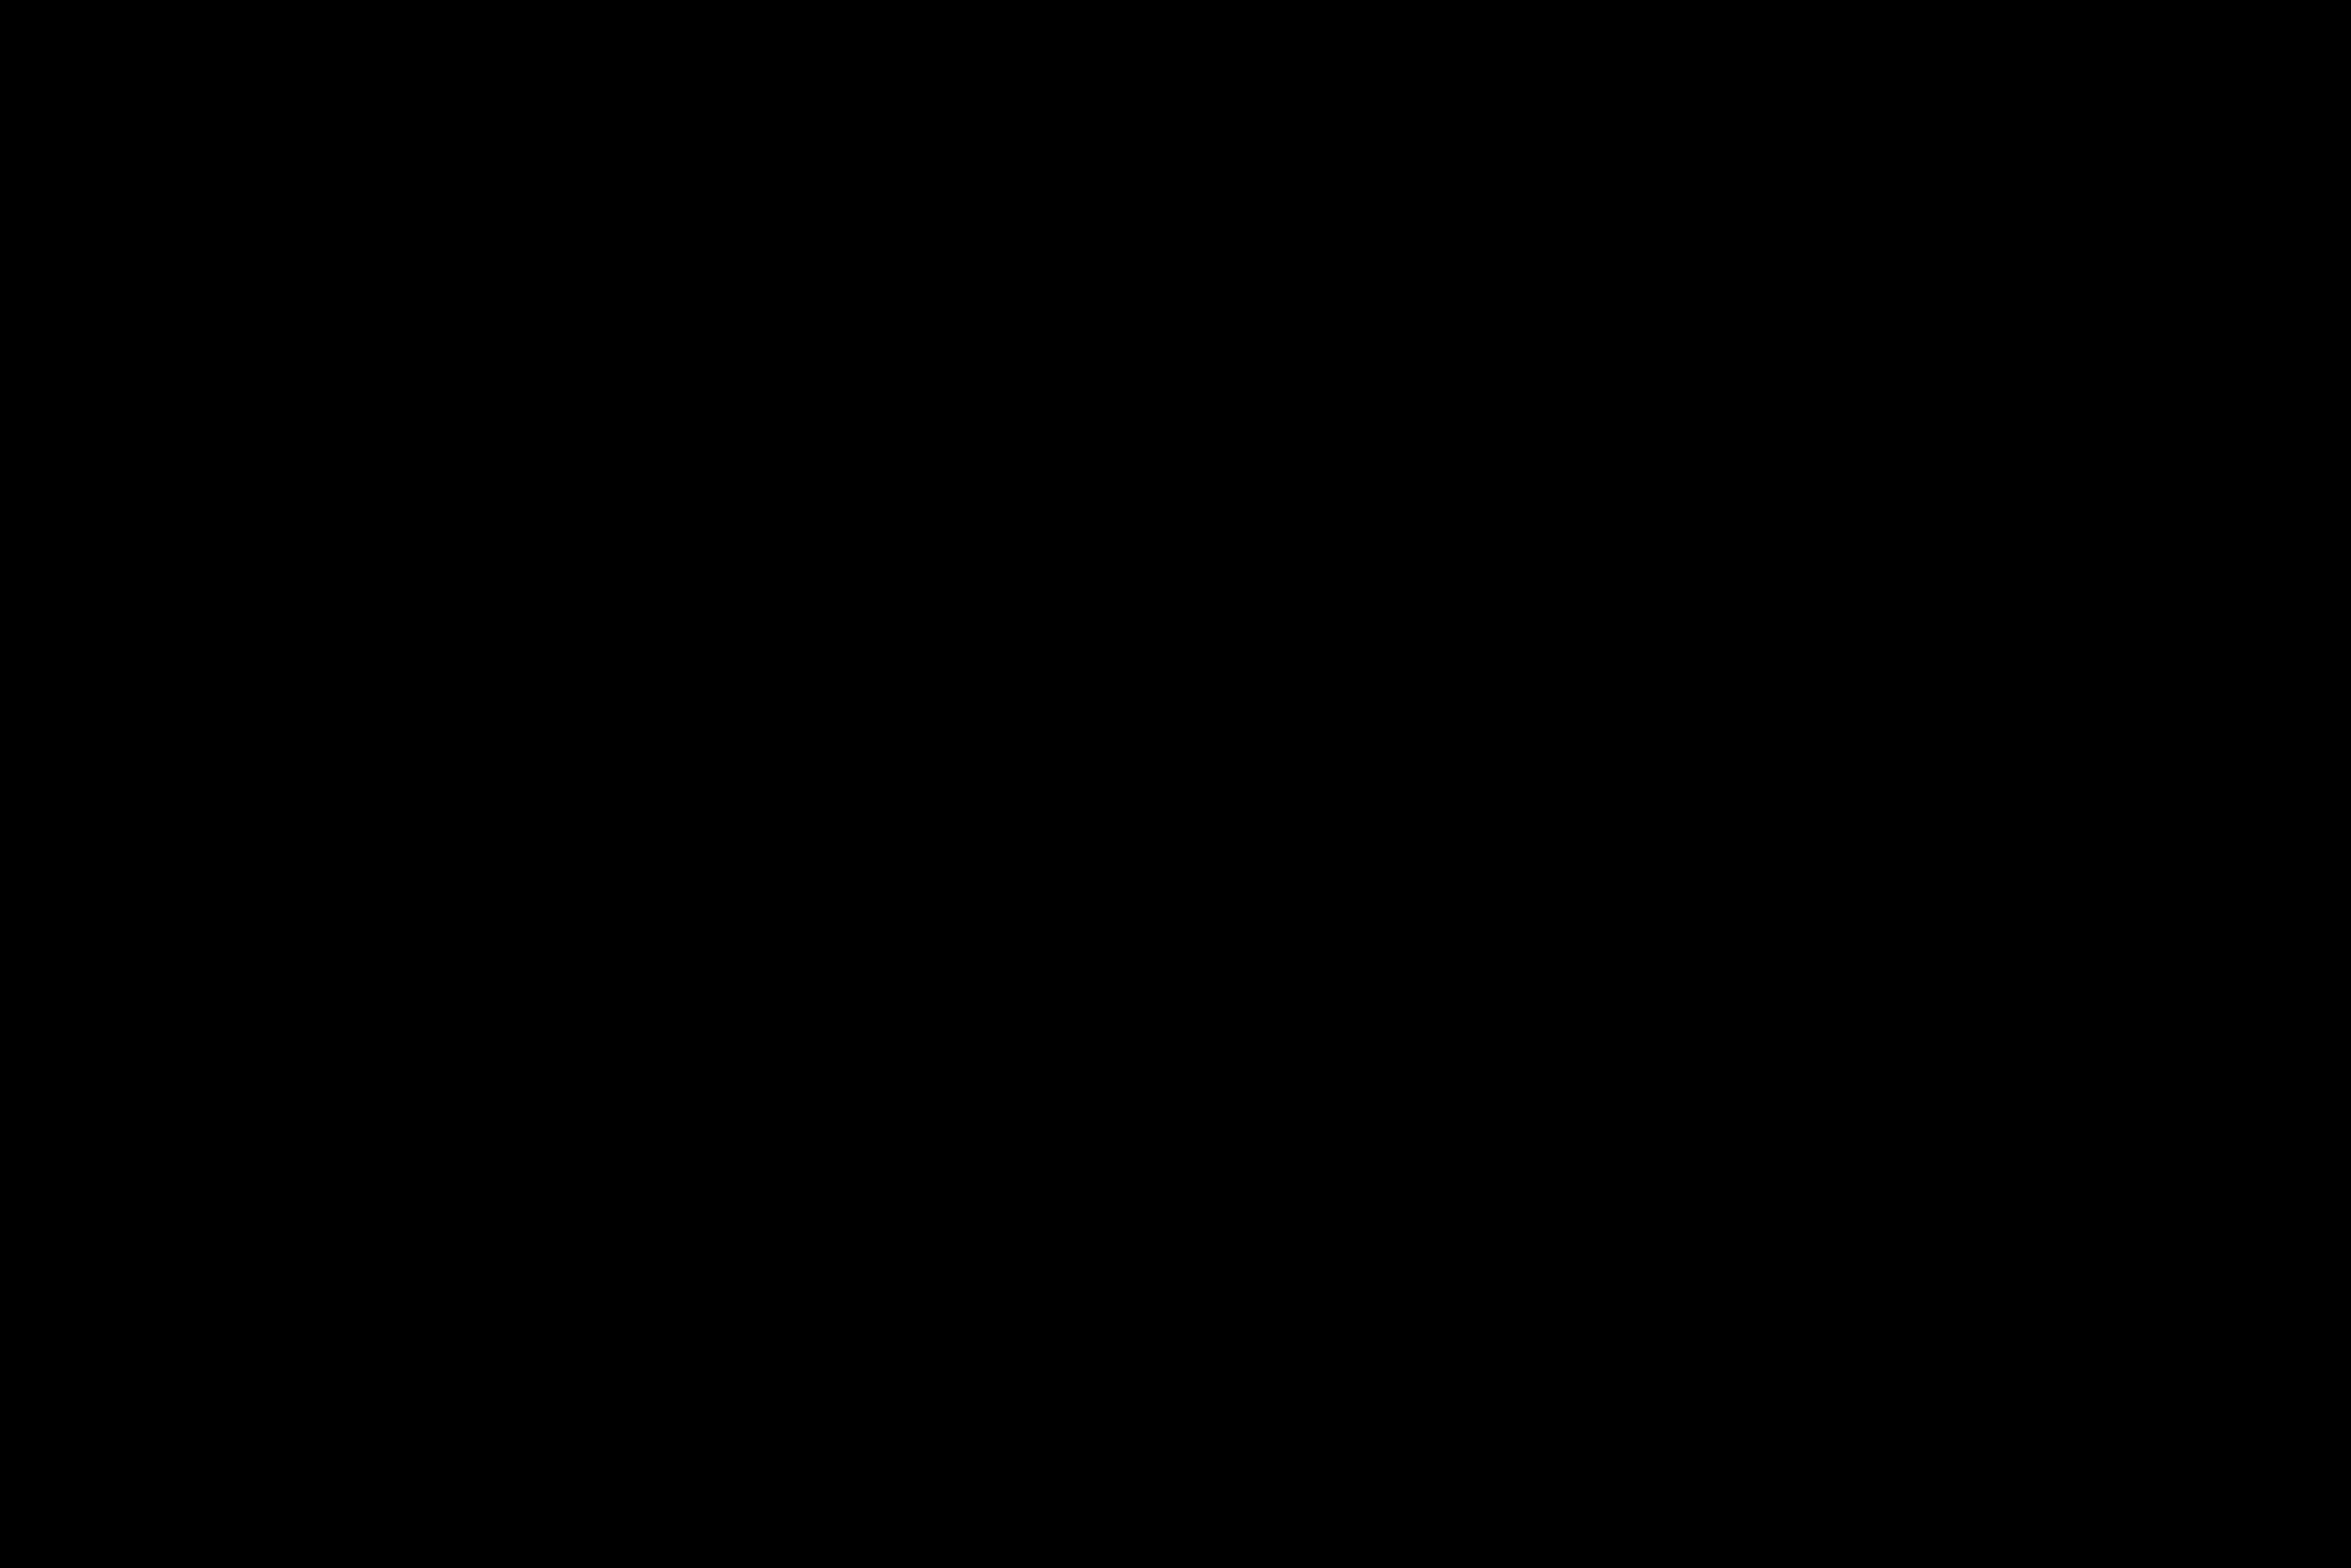

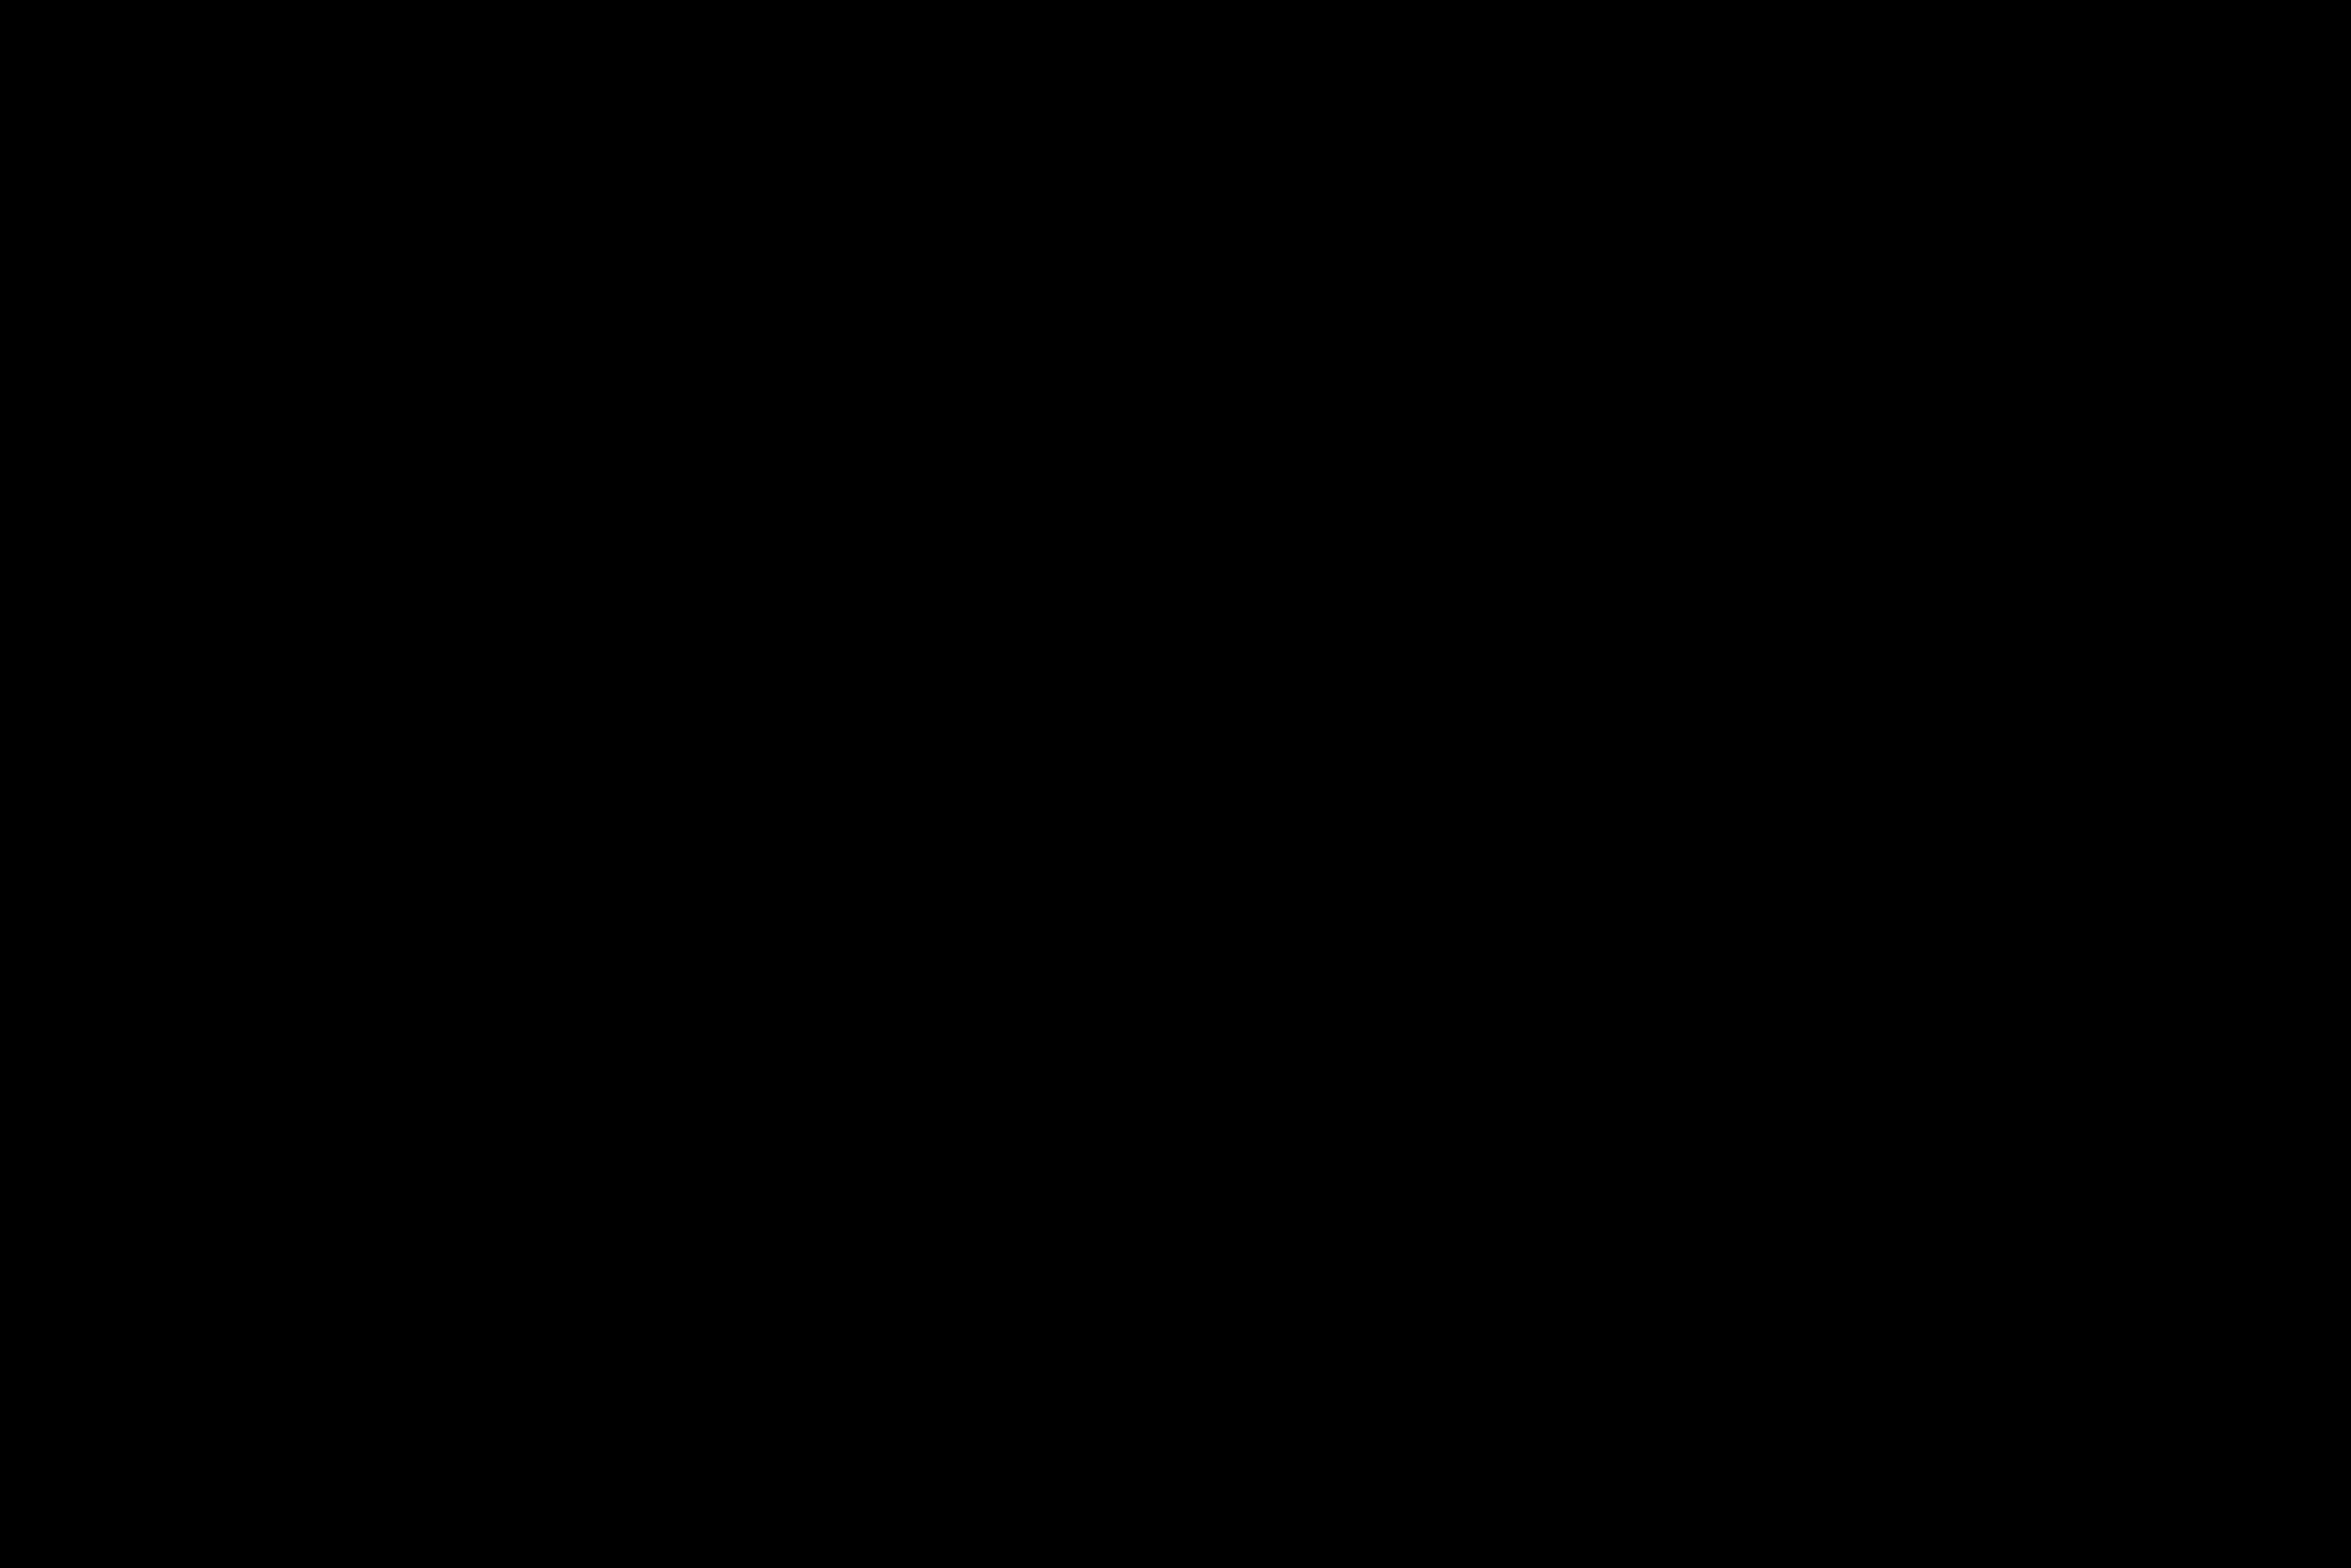

In [46]:
# Applying the filter2D() function
edges135 = cv2.filter2D(src=skimage_blur, ddepth=-1, kernel=filter135)

# Shoeing the original and output image
cv2_imshow(skimage_blur)
cv2_imshow(edges135)

cv2.waitKey()
cv2.destroyAllWindows()

(-1.3479659962063613,
 1.3479659962063613,
 -1.3479659962063613,
 1.3479659962063613)

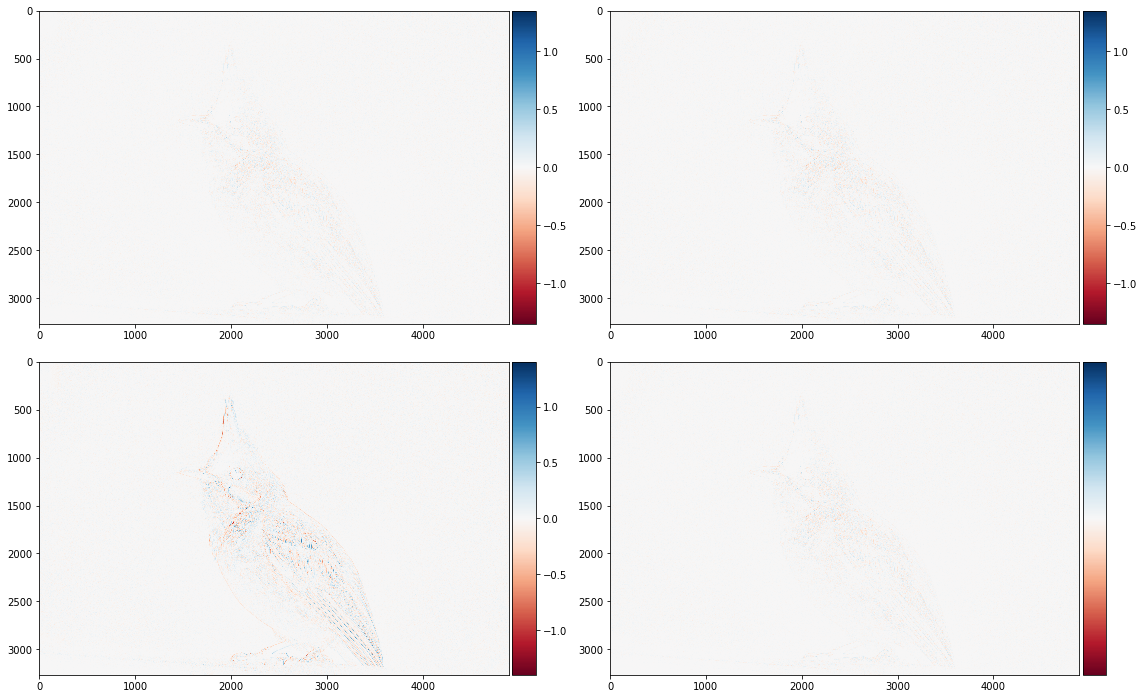

In [47]:
from matplotlib.figure import Figure

Edges_image=np.array([edges0,edges45,edges90,edges135])
#imshow(edges0)
fig = plt.figure(figsize=(16,10)) # Using a large canvas to depict the images clearly
for i in range(4):
    fig.add_subplot(2,2,i+1)
    imshow(Edges_image[i])
plt.axis('off')

In [48]:
HPF=np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])

strong_edges0=np.sum(np.multiply(edges0, HPF))
strong_edges45=np.sum(np.multiply(edges45, HPF))
strong_edges90=np.sum(np.multiply(edges90, HPF))
strong_edges135=np.sum(np.multiply(edges135, HPF))

ValueError: ignored

In [49]:
#For normalisation
Nor_image=strong_edges0+strong_edges45+strong_edges90+strong_edges135

NameError: ignored